************************
**********************
**********************

<center> <font size="48" face="Verdana"> Regressão Linear - Estudo

********************
********************
*********************


Cenário hipotético:

<tab>Foi obtido algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso!

As etapas abaixo irão analisar os dados do cliente. 
    
Fonte: [Kaggle: Ecommerce Customers](https://www.kaggle.com/datasets/srolka/ecommerce-customers)

### Importando as bibliotecas pertinentes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math

import warnings 
warnings.filterwarnings('ignore') #ignorar os alertas da sessão

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e a cor do seu avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

In [2]:
# importando o arquivo do Ecommerce Customers como um DataFrame chamado clientes
clientes = pd.read_csv("data/Ecommerce Customers")

In [3]:
print(f"O dataframe importado tem {clientes.shape[0]} registros e {clientes.shape[1]} colunas")

O dataframe importado tem 500 registros e 8 colunas


In [4]:
#Prévia do dataset
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#resumo estatístico
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [7]:
#resumo estatístico somente com as categóricas
clientes.describe(exclude='float64').T

,count,unique,top,freq
Email,500,500,mstephenson@fernandez.com,1
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1
Avatar,500,138,SlateBlue,7


In [8]:
#checagem de valores faltantes
clientes.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Análise de dados exploratória

**Vamos explorar os dados!**

Pelo resto do estudo, serão usados apenas os dados numéricos do dataset.
___


In [9]:
sns.set_palette("RdBu")
sns.set_style('whitegrid')

**Um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? Mais tempo no site, mais dinheiro gasto?**

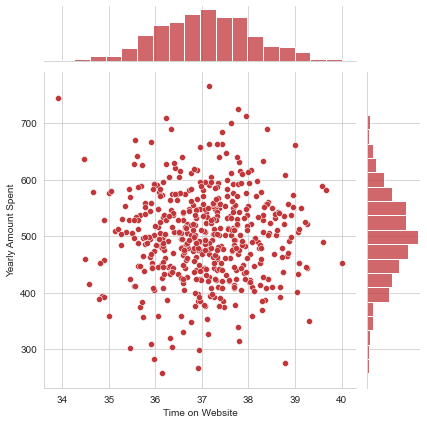

In [10]:
sns.jointplot(data=clientes,
              x='Time on Website',
              y='Yearly Amount Spent');

**O mesmo, mas com a coluna tempo no aplicativo (Time on App). Mais tempo no app, mais dinheiro gasto?**

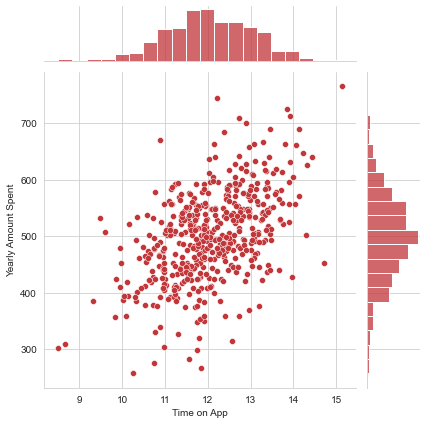

In [11]:
sns.jointplot(data=clientes,
              x='Time on App',
              y='Yearly Amount Spent');

**Comparando o tempo no aplicativo (Time on App) com o tempo da associação (Length of Membership)**

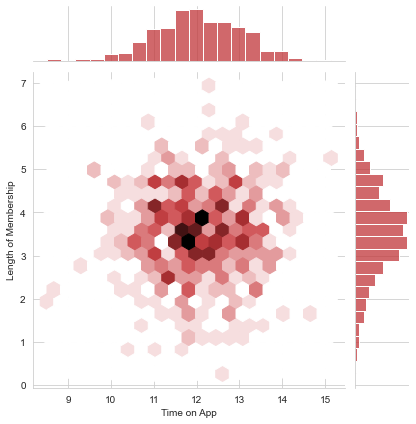

In [12]:
sns.jointplot(data=clientes,
              x='Time on App',
              y='Length of Membership',
              kind='hex'); # caixas hexagonais 2D

### Explorando as relações em todo o conjunto de dados com o uso do pairplot

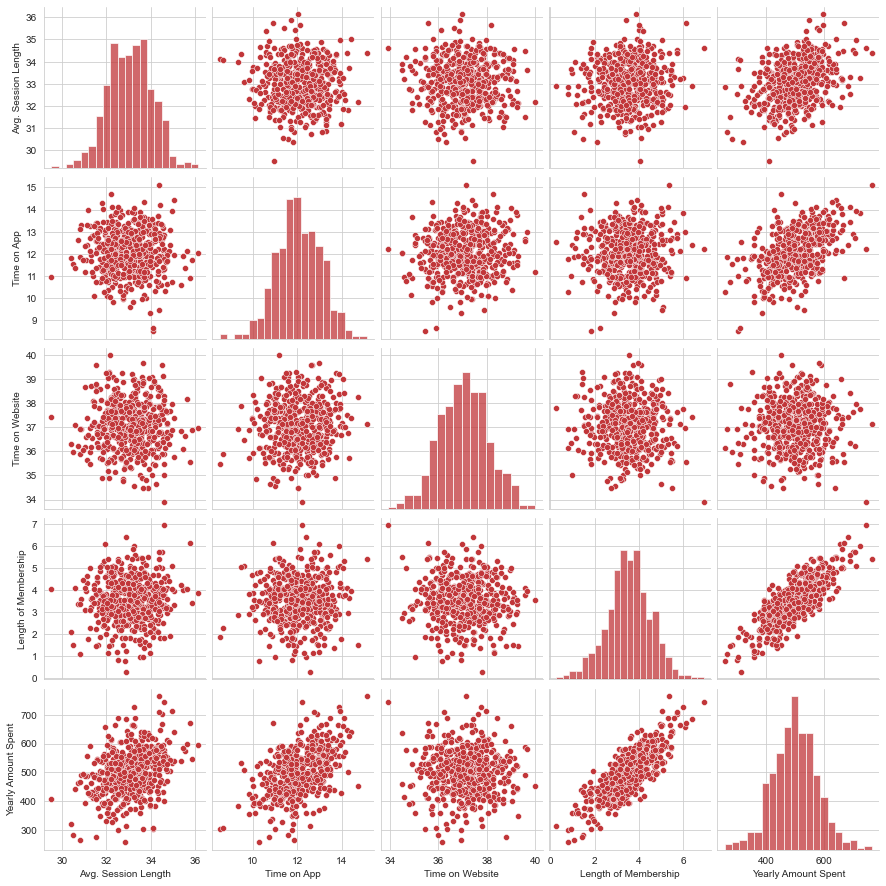

In [13]:
sns.pairplot(clientes);

**Este plot permite intuir que a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent) é o  Tempo como membro (Length of Membership)**

In [14]:
clientes.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [15]:
clientes[['Length of Membership','Yearly Amount Spent']].corr()

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


Correlação alta entre as duas colunas (0.8)

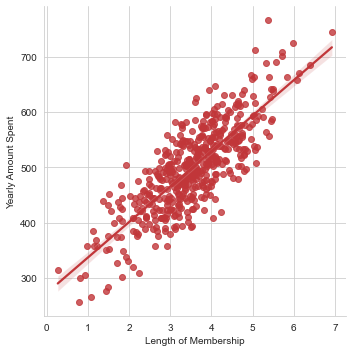

In [16]:
sns.lmplot(data=clientes,
           x='Length of Membership',
           y='Yearly Amount Spent');

**Um plot de um modelo linear da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership).**

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.


O conjunto `X` contém todas as variáveis numéricas dos clientes e a variável `y`será a nossa variável alvo Valor anual gasto (Yearly Amount Spent).

In [17]:
y = clientes['Yearly Amount Spent']#variável target

In [18]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]#explicativas

Divisão em conjunto de treino e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Treinando o modelo de regressão linear

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#Instanciando o modelo
lm = LinearRegression()

In [23]:
#adequando aos dados de treino
lm.fit(X_train,y_train)

LinearRegression()

**Print os coeficientes do modelo**

In [24]:
coefs = lm.coef_
print('Coeficientes: \n', (coefs).round(2))

Coeficientes: 
 [ 2.577e+01  3.880e+01 -2.000e-02  6.185e+01]


In [25]:
coefs = coefs.round(2)
print('y = ', X.columns[0],'*',coefs[0],' + ',X.columns[1],'*',coefs[1],' + ',X.columns[2],'*',coefs[2],' + ',X.columns[3],'*',coefs[3])

y =  Avg. Session Length * 25.77  +  Time on App * 38.8  +  Time on Website * -0.02  +  Length of Membership * 61.85


## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

In [26]:
# previsão do modelo usando co conjunto de teste
predictions = lm.predict(X_test)

**Um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

Text(0, 0.5, 'Preditos')

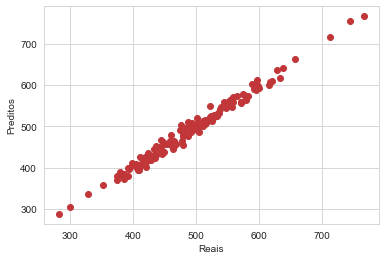

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Reais')
plt.ylabel('Preditos')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado ( $R ^2$ ).

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.851377170861443
MSE: 94.55779479273252
RMSE: 9.724083236620947


## Resíduos

Como era esperado, esse modelo possui um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

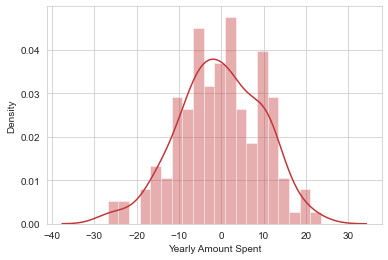

In [29]:
#Trace um histograma dos resíduos
sns.distplot((y_test-predictions),bins=20);

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

In [30]:
coeficientes = pd.DataFrame(lm.coef_,X.columns)
coeficientes.columns = ['coeficientes']
coeficientes.round(2)

,coeficientes
Avg. Session Length,25.77
Time on App,38.80
Time on Website,-0.02
Length of Membership,61.85


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**,
* um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,77 dólares
* um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,80 dólares totais gastos.

* um aumento de 1 unidade no tempo no site está associado a uma variação de -0,02 dólares.

* um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,85 dólares.

**A empresa deve se concentrar mais em seu aplicativo móvel ou em seu site?**

Primeiramente, a empresa provevelmente deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluenciam os gastos dos seus usuários. 

Entre site e aplicativo, investiriamos no aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site.